In [1]:
import numpy as np

R = np.array([[0.5076271,  0.3434859,  0.7901469],
  [ 0.8382091,  0.0152542, -0.5451356],
  [-0.1992995,  0.9390339, -0.2801695]])

if (R[2,2] < 0):
    if (R[0,0] >R[1,1]):
        t = 1 + R[0,0] -R[1,1] -R[2,2]
        q = np.array([t, R[0,1]+R[1,0], R[2,0]+R[0,2], R[1,2]-R[2,1]])
    else:
        t = 1 -R[0,0] + R[1,1] -R[2,2]
        q = np.array([R[0,1]+R[1,0], t, R[1,2]+R[2,1], R[2,0]-R[0,2]])
else:
    if (R[0,0] < -R[1,1]):
        t = 1 -R[0,0] -R[1,1] + R[2,2]
        q = np.array([R[2,0]+R[0,2], R[1,2]+R[2,1], t, R[0,1]-R[1,0]])
    else:
        t = 1 + R[0,0] + R[1,1] + R[2,2]
        q = np.array([R[1,2]-R[2,1], R[2,0]-R[0,2], R[0,1]-R[1,0], t])
q *= 0.5 / np.sqrt(t)
q

array([ 0.66568431,  0.44378956,  0.22189474, -0.55738489])

In [2]:
from scipy.spatial.transform import Rotation as ScipyRot
plot_lambda_bar = []
rot = ScipyRot.from_matrix(R)
print(rot.as_quat())

[0.66568432 0.44378957 0.22189475 0.5573849 ]


In [3]:
import numpy as np
b_v = np.random.normal(0, 0.1, 100)

In [2]:
import numpy as np
lm = np.transpose(np.array([[2.5, 2.5, 0]]))
p = np.transpose(np.array([[2.5,0,10]]))
p_hat = np.transpose(np.array([[-2, 4, 3]]))
R = np.eye(3)
R_hat = np.array([[1, 0, 0], [0, 0, -1], [0, 1, 0]])
d = np.matmul(np.transpose(R), (p-lm)/np.linalg.norm(p-lm))
Pi = np.eye(3) - np.matmul(d, np.transpose(d))
origin = np.transpose(np.array([[0, 0, 0]]))


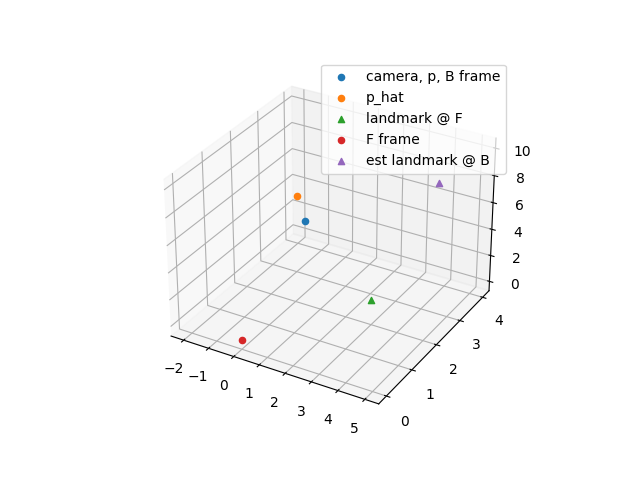

In [18]:
import matplotlib.pyplot as plt
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*p, marker="o", label='camera, p, B frame')
x_axis_rotated = R @ np.array([1, 0, 0])
y_axis_rotated = R @ np.array([0, 1, 0])
z_axis_rotated = R @ np.array([0, 0, 1])

# ax.quiver(*p, *x_axis_rotated, length=0.1, color='r', arrow_length_ratio=0.1, label='X-axis (rotated)')
# ax.quiver(*p, *y_axis_rotated, length=0.1, color='g', arrow_length_ratio=0.1, label='Y-axis (rotated)')
# ax.quiver(*p, *z_axis_rotated, length=0.1, color='b', arrow_length_ratio=0.1, label='Z-axis (rotated)')

ax.scatter(*p_hat, marker="o", label='p_hat')
ax.scatter(*lm, marker='^', label='landmark @ F')
ax.scatter(*origin, marker="o", label='F frame')
est_lm = (np.transpose([np.matmul(np.transpose(R), lm)]) + p)[0]
ax.scatter(*est_lm, marker='^', label='est landmark @ B')
# ax.quiver(*p, *(np.transpose([np.matmul(np.transpose(R_hat), lm)]) + p)[0], length=20, label='est landmark @ B')
# ax.scatter(*(np.transpose([np.matmul(np.transpose(R_hat), p_hat)]) + p)[0], marker="o", label='p_bar_hat')

# ax.quiver(*lm, *d, length=np.linalg.norm(d)*10, color='r', arrow_length_ratio=0.1)
# projected_vector = Pi @ (np.matmul(np.transpose(R_hat), p_hat) - np.matmul(np.transpose(R_hat), lm))
# projected_vector = np.matmul(Pi , np.matmul(np.transpose(R_hat), lm))
# projected_vector2 = np.matmul(Pi , np.matmul(np.transpose(R_hat), p_hat))
# ax.quiver(*lm, *projected_vector, length=np.linalg.norm(projected_vector)/8, color='b', arrow_length_ratio=0.1, label='Projected Vector')
# ax.quiver(*p, *projected_vector2, length=np.linalg.norm(projected_vector2), arrow_length_ratio=0.1, label='Projected Vector2')
# ax.quiver(*lm, *d, length=10, color='r', arrow_length_ratio=0.1)
ax.legend()

In [32]:
import numpy as np
def dynamics(t, y, arg1, arg2):
    alpha = 1.1  # Prey growth rate
    beta = 0.4   # Predation rate
    delta = 0.1  # Predator growth rate
    gamma = 0.4  # Predator death rate

    prey, predator = y  # Unpack the values

    dydt_prey = alpha * prey - beta * prey * predator
    dydt_predator = delta * prey * predator - gamma * predator
    return np.array([dydt_prey, dydt_predator])



def rk45_step(t, y, dt, args):
    a2, a3, a4, a5, a6 = 1/5, 3/10, 4/5, 8/9, 1
    b21 = 1/5
    b31, b32 = 3/40, 9/40
    b41, b42, b43 = 44/45, -56/15, 32/9
    b51, b52, b53, b54 = 19372/6561, -25360/2187, 64448/6561, -212/729
    b61, b62, b63, b64, b65 = 9017/3168, -355/33, 46732/5247, 49/176, -5103/18656
    c1, c2, c3, c4, c5, c6 = 35/384, 0, 500/1113, 125/192, -2187/6784, 11/84

    # Runge-Kutta stages
    k1 = dynamics(t, y, *args)
    k2 = dynamics(t + a2*dt, y + dt*b21*k1, *args)
    k3 = dynamics(t + a3*dt, y + dt*(b31*k1 + b32*k2), *args)
    k4 = dynamics(t + a4*dt, y + dt*(b41*k1 + b42*k2 + b43*k3), *args)
    k5 = dynamics(t + a5*dt, y + dt*(b51*k1 + b52*k2 + b53*k3 + b54*k4), *args)
    k6 = dynamics(t + a6*dt, y + dt*(b61*k1 + b62*k2 + b63*k3 + b64*k4 + b65*k5), *args)

    # Update step
    y_next = y + dt*(c1*k1 + c2*k2 + c3*k3 + c4*k4 + c5*k5 + c6*k6)
    return y_next.tolist()

noise = False
Rtol=1e-9 #with noise, 1e-6
Atol=1e-9 #with noise, 1e-6

######################################################
################# initialization #####################
######################################################
# initial_state = 0.1
initial_state = np.array([0.1, 0.1], dtype=np.float64)
initial_state1 = [0.1, 0.1]

# def rk45():
time = (0, 0.1)
stepsize = 0.0001
times = np.arange(*time, stepsize)

soly = []
soly.append(initial_state1)
args = (1, 2)
for idx, current_time in enumerate(times[:-1]):
    dt = times[idx + 1] - current_time
    soly.append(rk45_step(current_time, soly[-1], dt, args))
soly = np.array(soly)
from scipy.integrate import solve_ivp
sol = solve_ivp(dynamics, time, initial_state, args=args, t_eval=times, method="RK45", rtol=Rtol, atol=Atol)

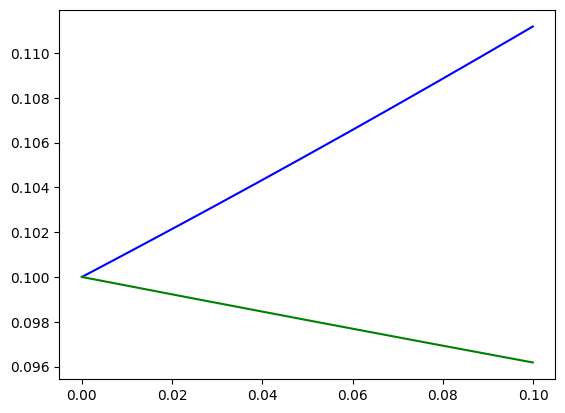

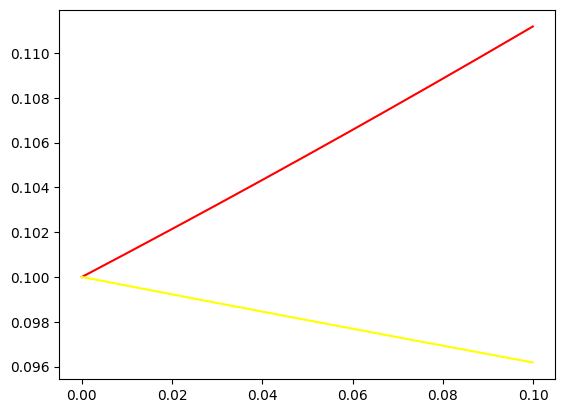

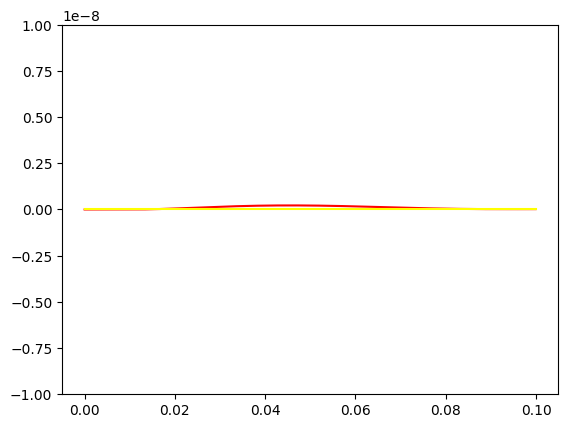

In [39]:
import matplotlib.pyplot as plt

figure = plt.subplot()
plt.plot(times, soly[:,0], color='b')
plt.plot(times, soly[:,1], color='g')
plt.show()
plt.plot(sol.t, sol.y[0], color='r')
plt.plot(sol.t, sol.y[1], color='yellow')
plt.show()
plt.plot(sol.t, sol.y[0]-soly[:,0], color='r')
plt.plot(sol.t, sol.y[1]-soly[:,1], color='yellow')
plt.ylim(-1e-8, 1e-8)
plt.show()


In [1]:
import numpy as np

# Assuming q is a list of values
q = [10, 20, 30]  # Example values, can be of any length

# Create a list of 3x3 diagonal matrices, each scaled by corresponding q[i]
blocks = [np.diag([q[i]] * 3) for i in range(len(q))]

# Horizontally stack these blocks to form the final matrix
Q = np.block(blocks)

print(Q)

[[10  0  0 20  0  0 30  0  0]
 [ 0 10  0  0 20  0  0 30  0]
 [ 0  0 10  0  0 20  0  0 30]]
